In [0]:
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd

In [0]:
import matplotlib.pyplot as plt

#cargamos informacion de iris
iris = datasets.load_iris()

In [0]:
X_iris = iris.data
Y_iris = iris.target

In [4]:
x = pd.DataFrame(iris.data, columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns = ['Target'])
x.head(5)

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Text(0, 0.5, 'Petal Width')

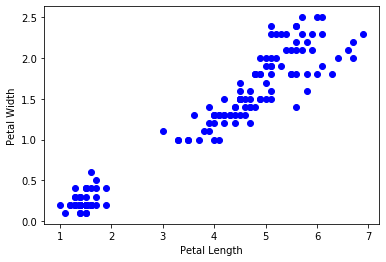

In [5]:
plt.scatter(x['Petal Length'], x['Petal Width'], c = 'blue')
plt.xlabel('Petal Length', fontsize = 10)
plt.ylabel('Petal Width', fontsize = 10)

In [0]:
# n_cluster = 2, el numero de agrupaciones, numero de centroides
# 2 porque visualmente parece haber 2
# iterar como vamos a mover k hasta encontrar distancia mas cercana
# a cada punto
model = KMeans(n_clusters = 3, max_iter = 1000)
model.fit(x)
y_labels = model.labels_

In [23]:
y_kmeans = model.predict(x)
y_kmeans_df = pd.DataFrame(y_kmeans, columns = ['Prediction'])
print('predicciones ', y_kmeans)

predicciones  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [8]:
# mirar la precision de l model
from sklearn import metrics

accuracy =  metrics.adjusted_rand_score(Y_iris, y_kmeans)
print(accuracy)
# con un n_clusters de 2 da un accuracy del 50%, es muy bajo
# por lo que cambiamos el numerode clusters a 3 y da accuracy 73%
# volvemos a incrementar n_cluster para ver como nos da accurracy de nuevo
# cuando es 4 la accuracy baja a 64% lo que nos da que el numero ideal es 3

0.7302382722834697


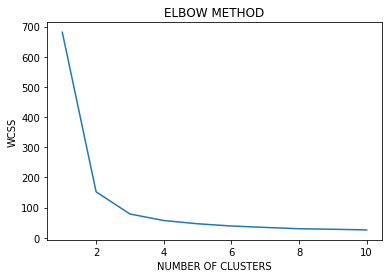

In [9]:
# Within-Cluster-Sum-of-Squares (WCSS)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=1000, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('ELBOW METHOD')
plt.xlabel('NUMBER OF CLUSTERS')
plt.ylabel('WCSS')
plt.show()

Text(0, 0.5, 'Petal Width')

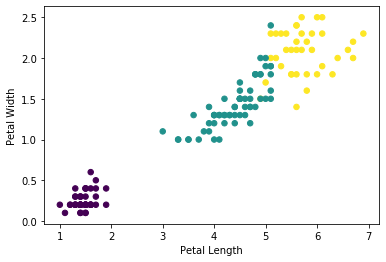

In [10]:
# graficamos e scatter plot, colores definidos por y_kmeans,
# tamano de los puntos s = 30
# aqui vemos la clasificacion
plt.scatter(x['Petal Length'], x['Petal Width'], c = y_kmeans, s = 30)
plt.xlabel('Petal Length', fontsize = 10)
plt.ylabel('Petal Width', fontsize = 10)


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


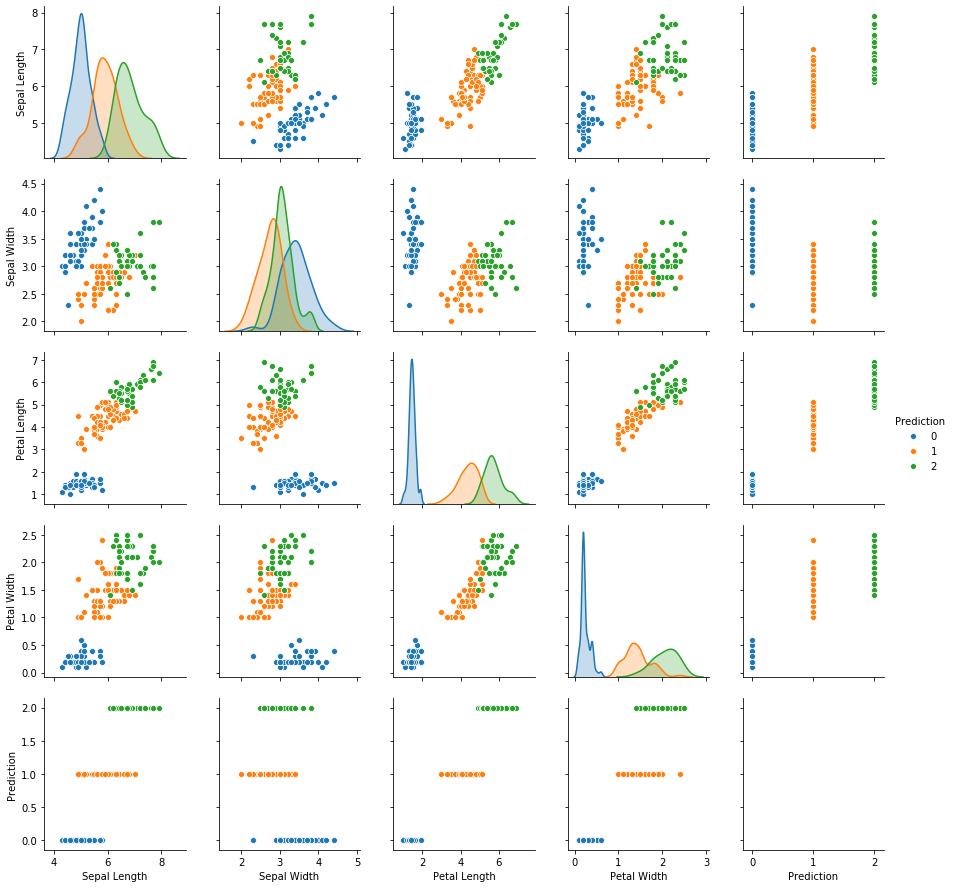

In [24]:
import seaborn as sns
Z = pd.concat([x,y_kmeans_df],axis=1)
sns.pairplot(Z, hue = 'Prediction')

In [11]:
#cargamos informacion de wines
wines = datasets.load_wine()
print(wines)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [0]:
X_wines = wines.data
Y_wines = wines.target

In [13]:
xw = pd.DataFrame(X_wines, columns = ['Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of Ash', 'Magnesium', 
                                      'Total Phenols', 'Flavanoids', 'Nonflavanoid Phenols', 'Proanthocyanins', 
                                      'Colour Intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'])
yw = pd.DataFrame(Y_wines, columns = ['Target'])
xw.head(5)

,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Colour Intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


numero de n_clusters: 1 accurracy 0.0
numero de n_clusters: 2 accurracy 0.3694075388574537
numero de n_clusters: 3 accurracy 0.37111371823084754
numero de n_clusters: 4 accurracy 0.30344253157834694
numero de n_clusters: 5 accurracy 0.31158801033176253
numero de n_clusters: 6 accurracy 0.29090227688418224
numero de n_clusters: 7 accurracy 0.22632105878612552
numero de n_clusters: 8 accurracy 0.19933615927955298
numero de n_clusters: 9 accurracy 0.18197901068434116
numero de n_clusters: 10 accurracy 0.15432452307609384


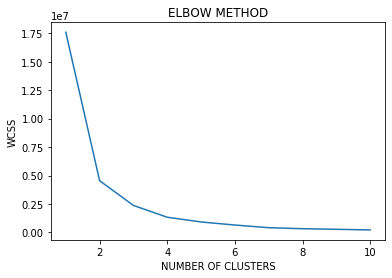

In [14]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=1000, random_state=0)
    kmeans.fit(xw)
    yw_kmeans = kmeans.predict(xw)
    wcss.append(kmeans.inertia_)
    accuracy =  metrics.adjusted_rand_score(Y_wines, yw_kmeans)
    print(f'numero de n_clusters: {i} accurracy {accuracy}')
plt.plot(range(1, 11), wcss)
plt.title('ELBOW METHOD')
plt.xlabel('NUMBER OF CLUSTERS')
plt.ylabel('WCSS')
plt.show()

In [15]:
# n_cluster = 2, el numero de agrupaciones, numero de centroides
# 2 porque visualmente parece haber 2
# iterar como vamos a mover k hasta encontrar distancia mas cercana
# a cada punto
modelw = KMeans(n_clusters = 3, max_iter = 1000)
modelw.fit(xw)
yw_labels = modelw.labels_
print(yw_labels)

[2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 2 0 0 2 2 0 2 2 2 2 2 2 0 0
 2 2 0 0 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 1 1 0 1 1 0 0 0 1 1 2
 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0
 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1]


In [16]:
yw_kmeans = modelw.predict(xw)
print('predicciones ', yw_kmeans)

predicciones  [2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 2 0 0 2 2 0 2 2 2 2 2 2 0 0
 2 2 0 0 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 1 1 0 1 1 0 0 0 1 1 2
 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0
 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1]


In [17]:
yw_kmeans_df = pd.DataFrame(yw_kmeans, columns = ['Prediction'])
yw_kmeans_df

,Prediction
0,2
1,2
2,2
3,2
4,0
...,...
173,0
174,0
175,0
176,0


Text(0, 0.5, 'Total Phenols')

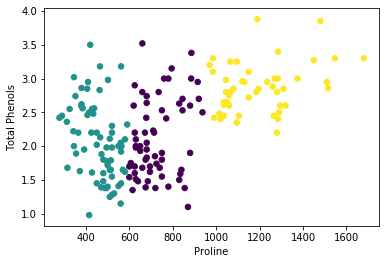

In [18]:
# graficamos e scatter plot, colores definidos por y_kmeans,
# tamano de los puntos s = 30
# aqui vemos la clasificacion
plt.scatter(xw['Proline'], xw['Total Phenols'], c = yw_kmeans, s = 30)
plt.xlabel('Proline', fontsize = 10)
plt.ylabel('Total Phenols', fontsize = 10)

In [19]:
# mirar la precision de l model
from sklearn import metrics

accuracyw =  metrics.adjusted_rand_score(Y_wines, yw_kmeans)
print(accuracyw)
# con un n_clusters de 2 da un accuracy del 50%, es muy bajo
# por lo que cambiamos el numerode clusters a 3 y da accuracy 73%
# volvemos a incrementar n_cluster para ver como nos da accurracy de nuevo
# cuando es 4 la accuracy baja a 64% lo que nos da que el numero ideal es 3

0.37111371823084754


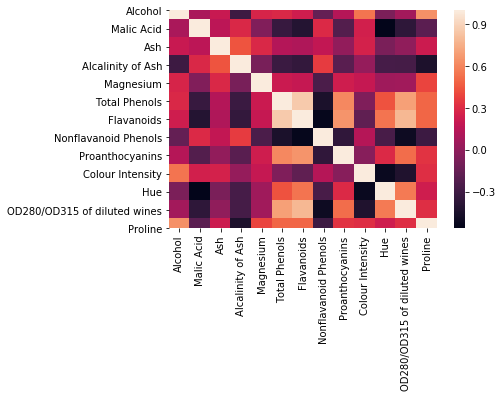

In [20]:
import seaborn as sns
sns.heatmap(xw.corr())

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


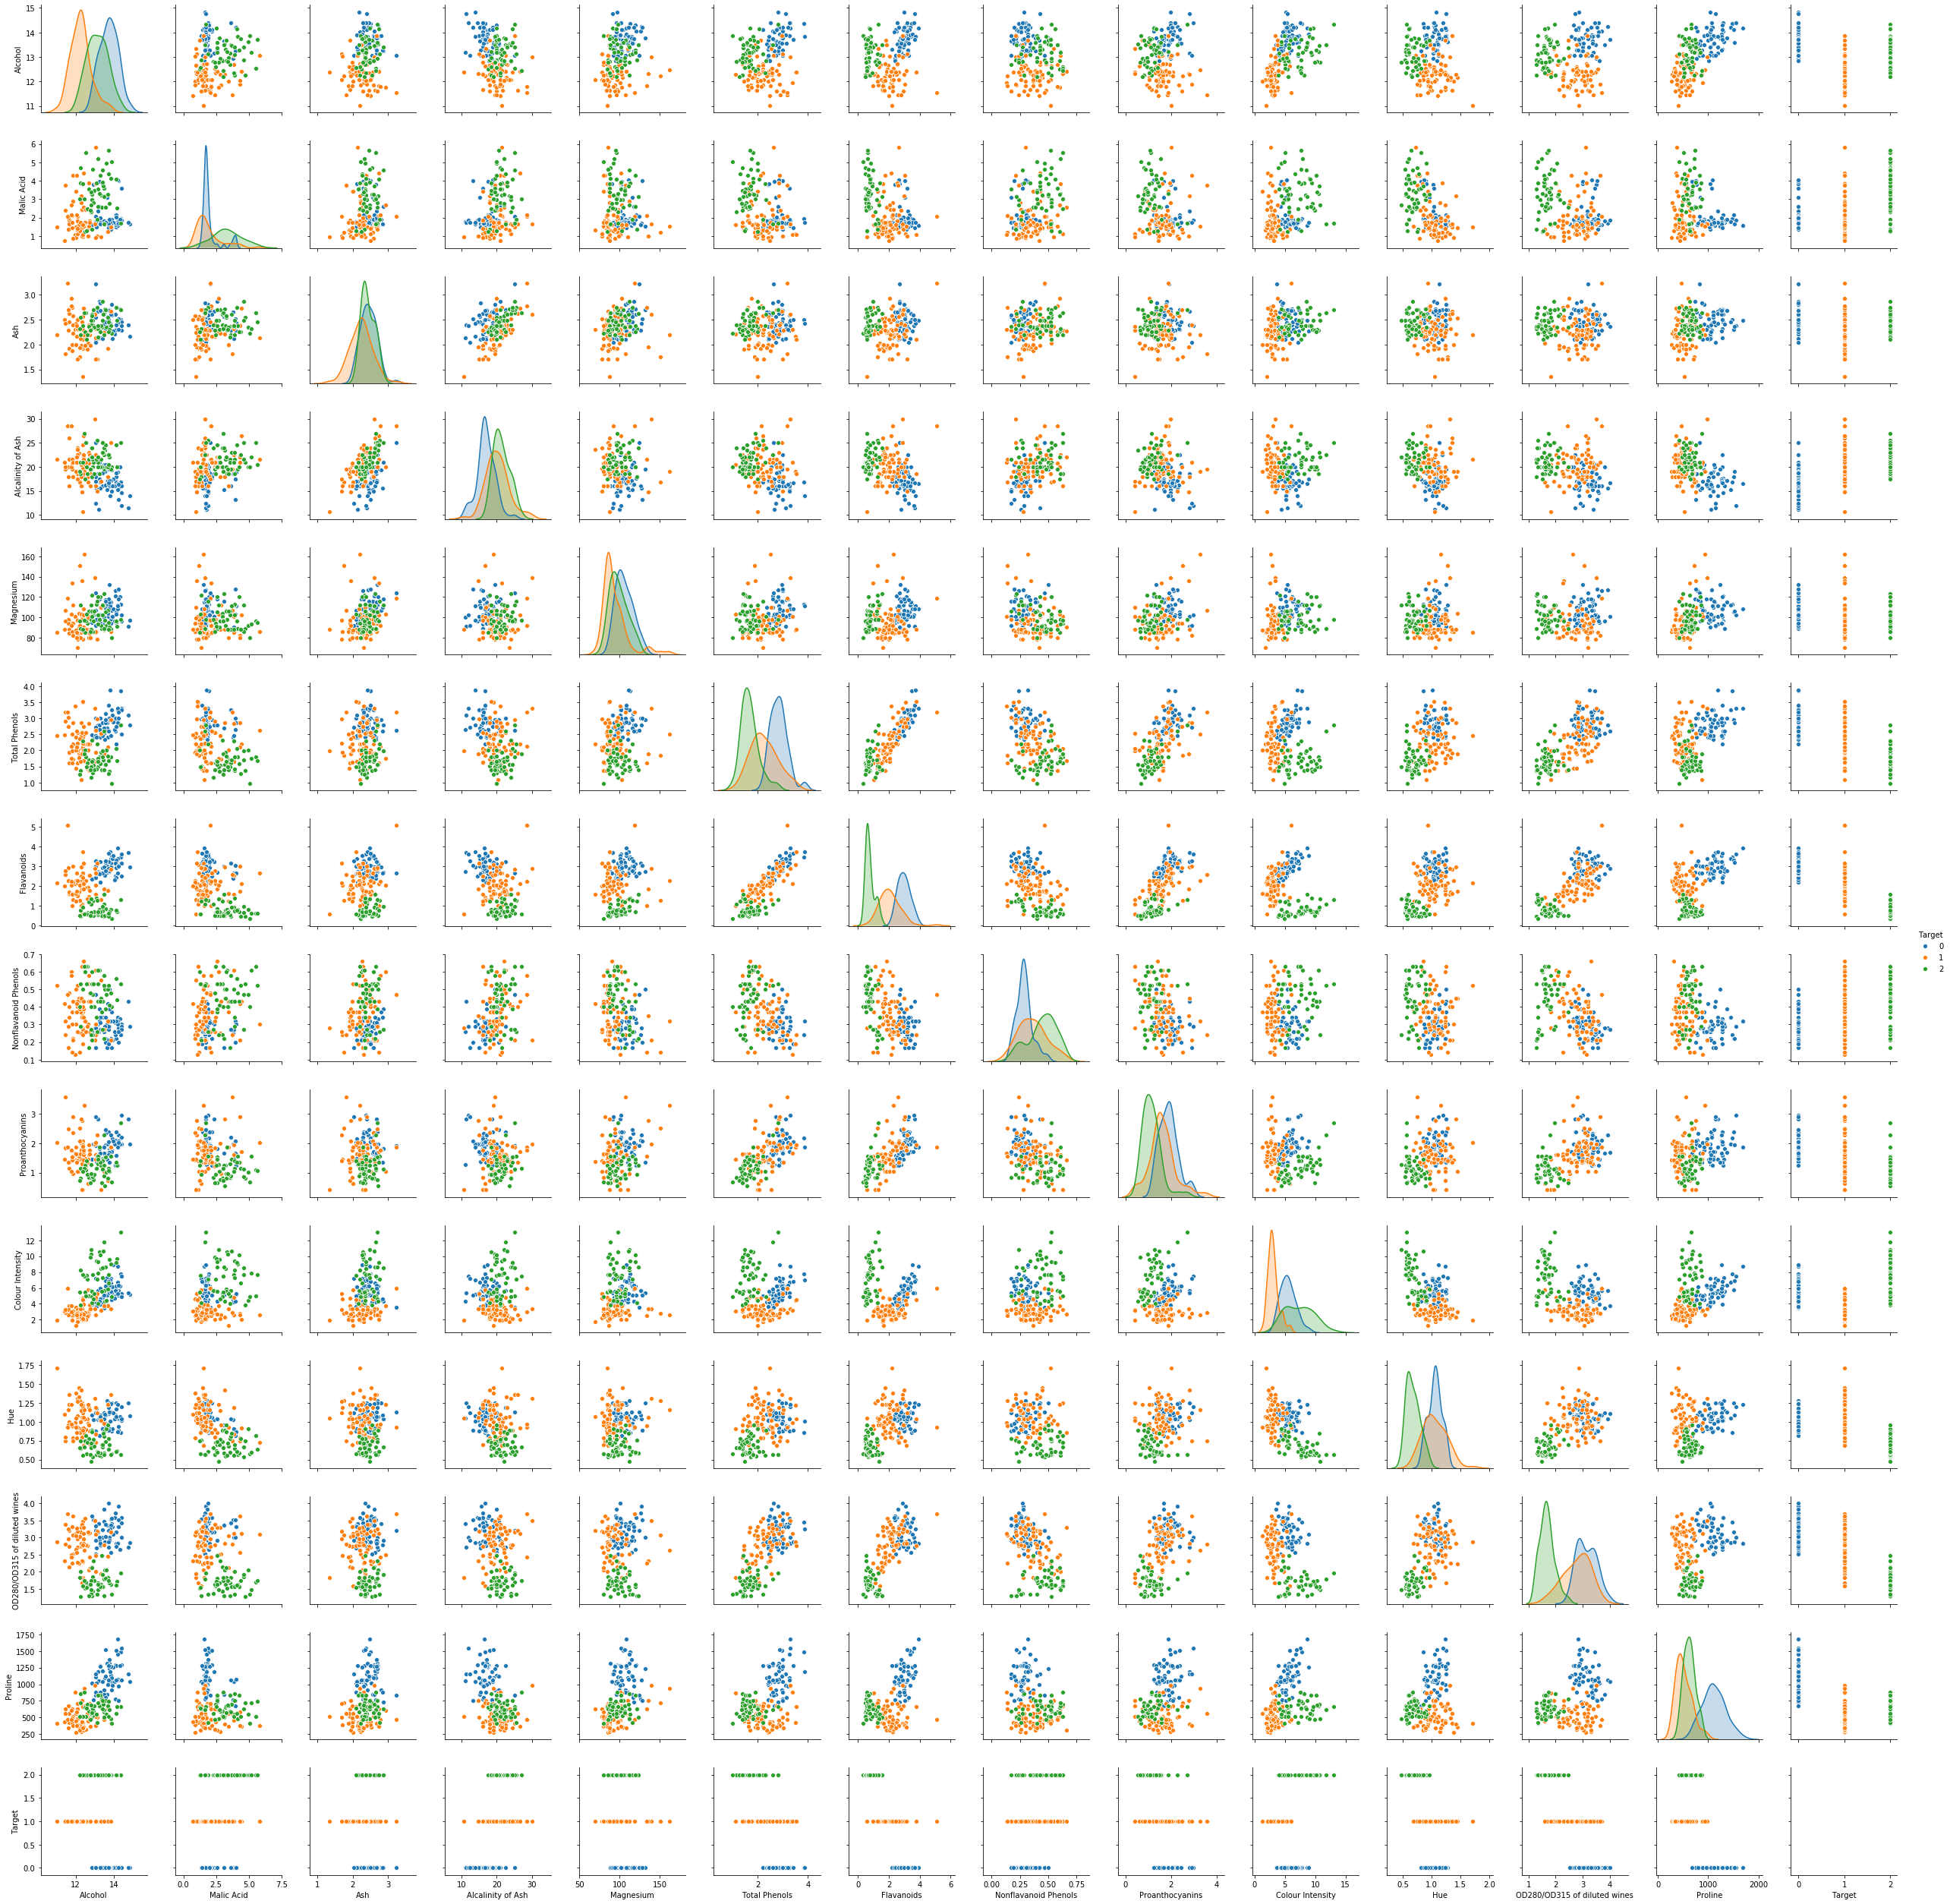

In [21]:
Z = pd.concat([xw,yw],axis=1)
sns.pairplot(Z, hue = 'Target')

In [0]:
Z = pd.concat([xw,yw_kmeans_df],axis=1)


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


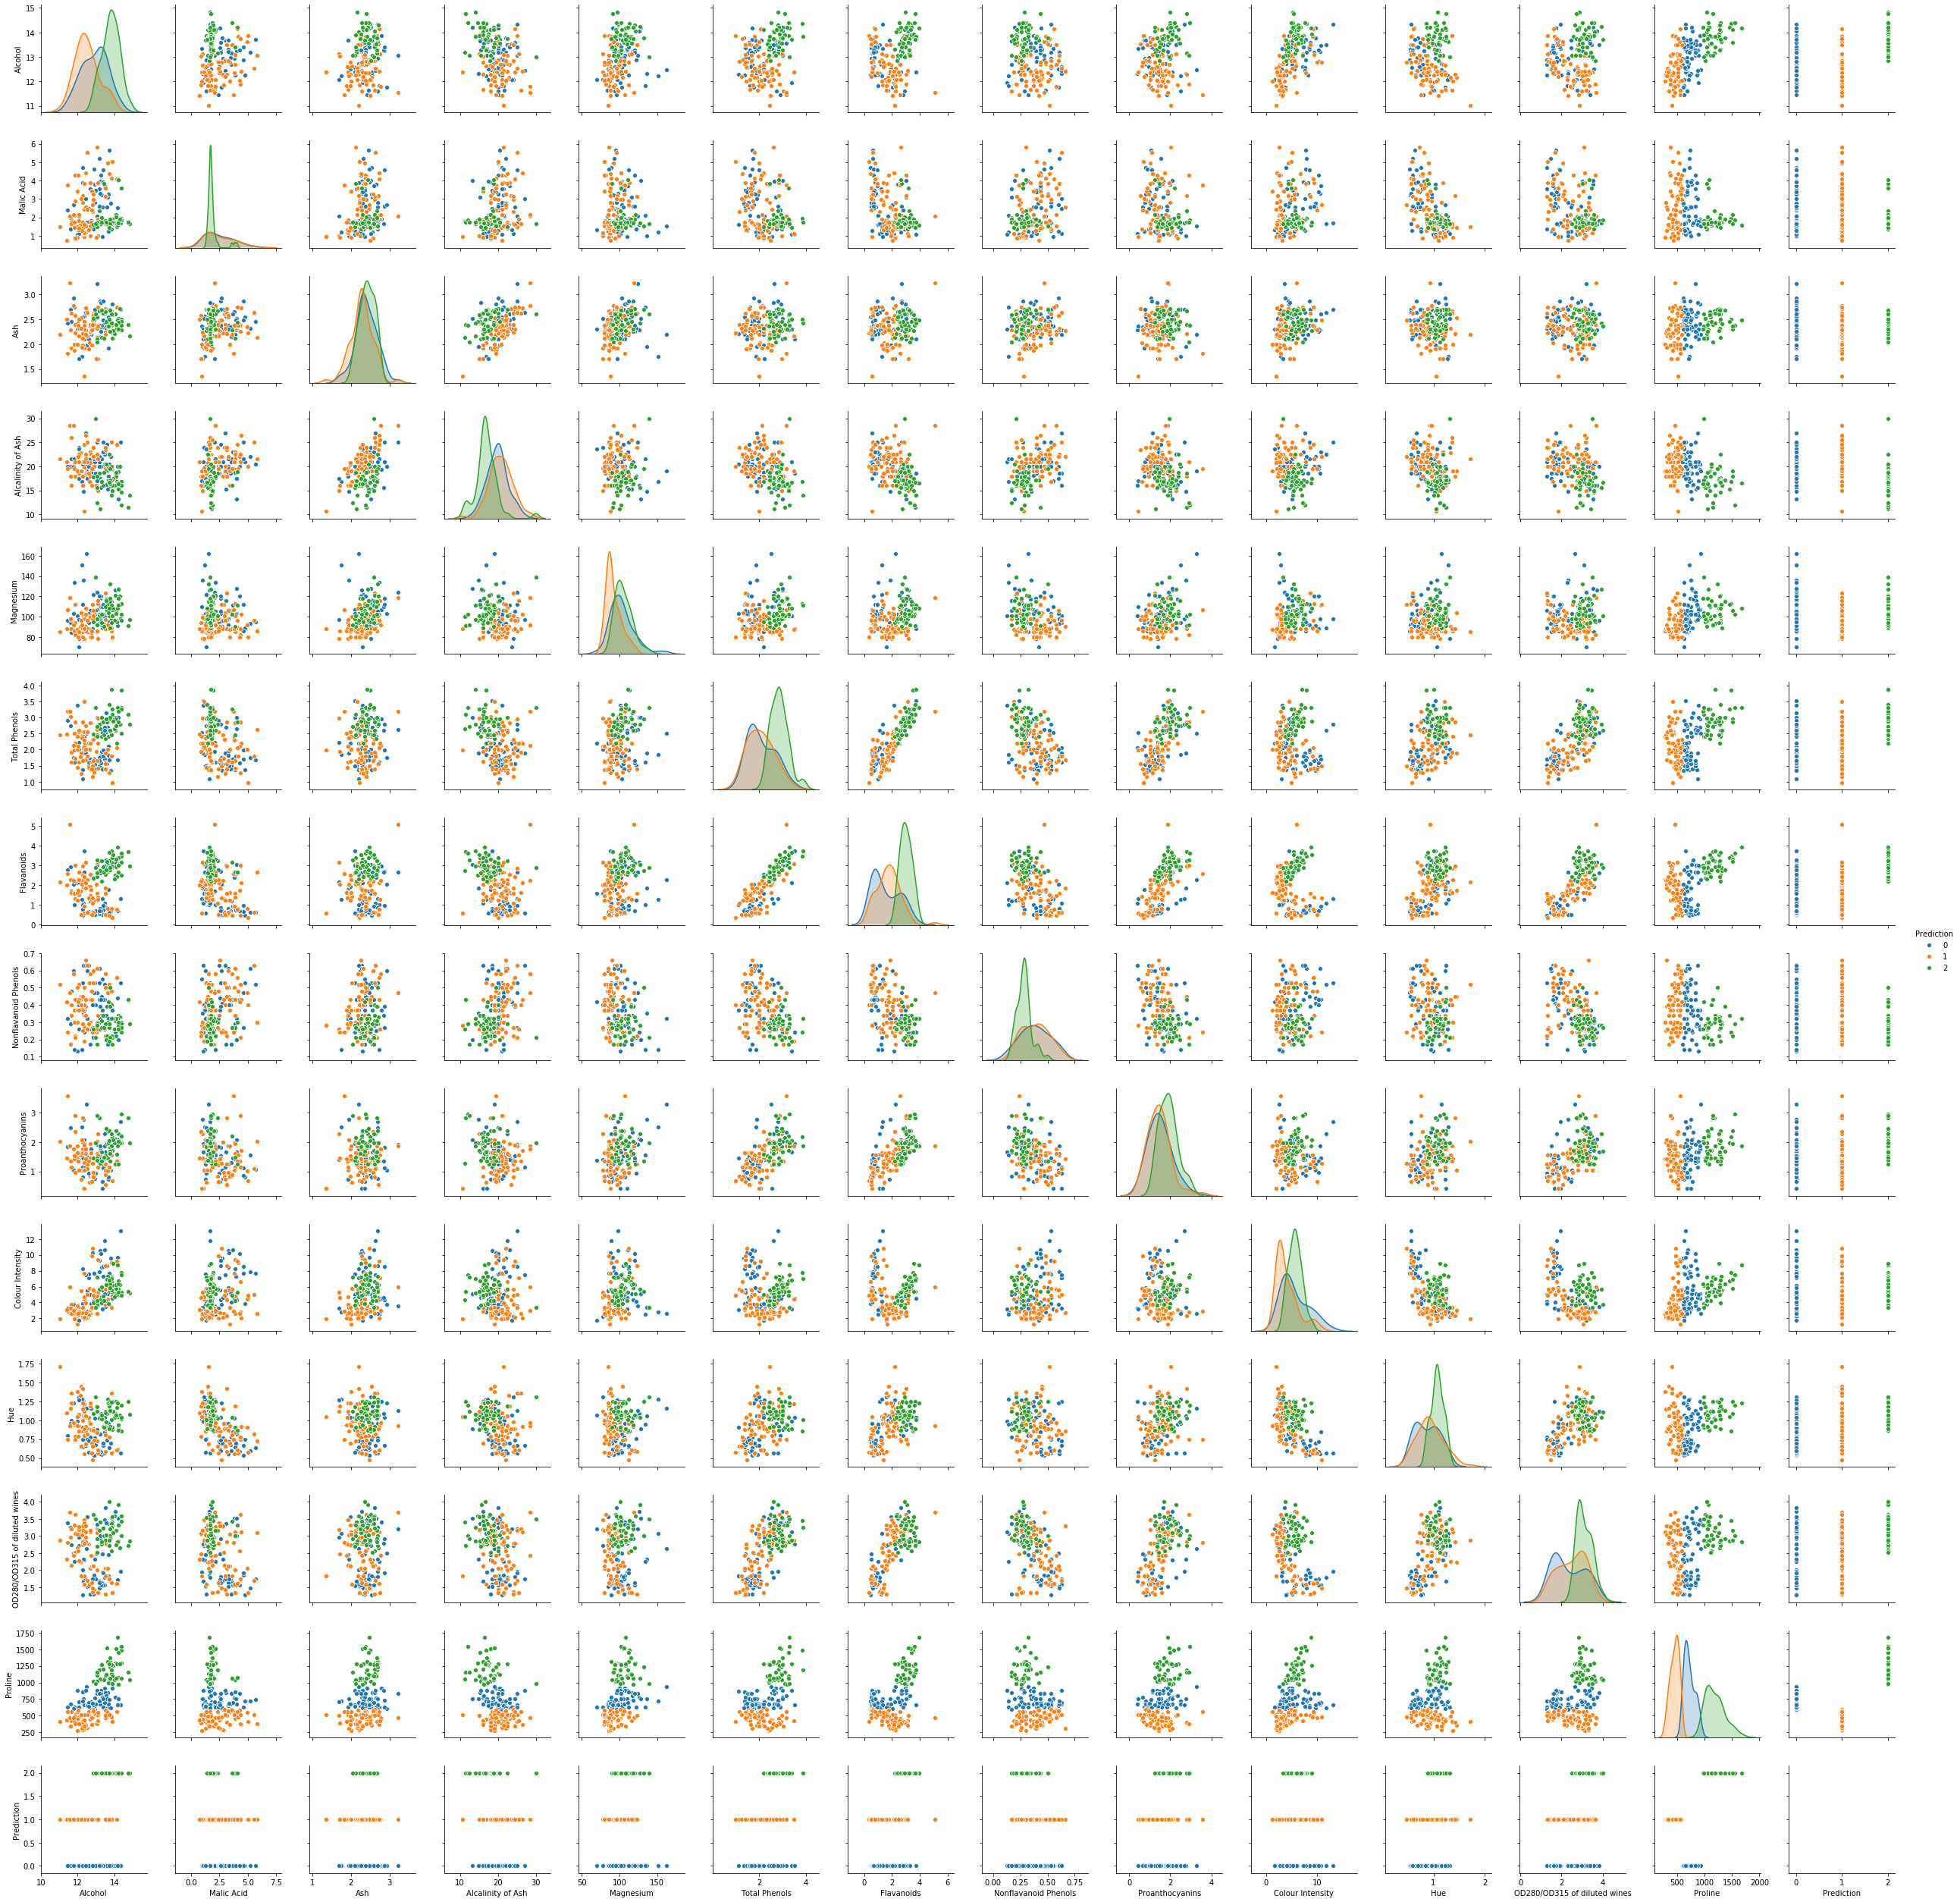

In [29]:
sns.pairplot(Z, hue = 'Prediction')

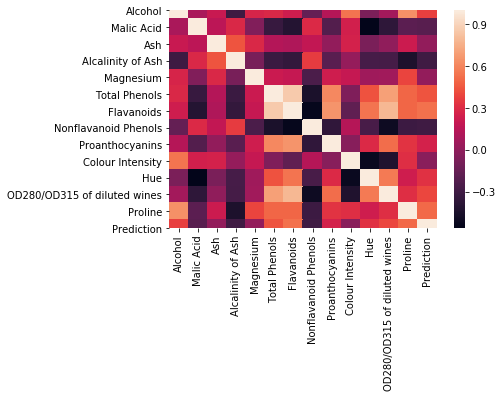

In [28]:
sns.heatmap(Z.corr())